In [1]:
# to install packages from jupyter notebook, based on https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/
#import sys
#!conda install --yes --prefix {sys.prefix} numpy

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# I'm using seaborn for it's fantastic default styles
import seaborn as sns
#sns.set_style("whitegrid")
#sns.color_palette("YlOrRd", 7)
sns.set_palette("YlOrRd", 7)
%matplotlib inline
%load_ext autoreload
%autoreload 2

from tutils import BaseStateSystem

In [2]:
def laplacian1D(a, dx):
    return (
        - 2 * a
        + np.roll(a,1,axis=0) 
        + np.roll(a,-1,axis=0)
    ) / (dx ** 2)

def laplacian2D(a, dx):
    return (
        - 4 * a
        + np.roll(a,1,axis=0) 
        + np.roll(a,-1,axis=0)
        + np.roll(a,+1,axis=1)
        + np.roll(a,-1,axis=1)
    ) / (dx ** 2)

In [47]:
def random_initialiser(shape):
    return(
        np.random.normal(loc=0, scale=0.1, size=shape),
        np.random.normal(loc=0, scale=0.1, size=shape)
    )
class TwoDimensionalRDEquations(BaseStateSystem):
    def __init__(self, Da, Db, Ra, Rb,
                 initialiser=random_initialiser,
                 width=1000, height=1000,
                 dx=1, dt=0.1, steps=1):
        
        self.Da = Da
        self.Db = Db
        self.Ra = Ra
        self.Rb = Rb

        self.initialiser = initialiser
        self.width = width
        self.height = height
        self.shape = (width, height)
        self.dx = dx
        self.dt = dt
        self.steps = steps
        
    def initialise(self):
        self.t = 0
        self.a, self.b = self.initialiser(self.shape)
        
    def update(self):
        for _ in range(self.steps):
            self.t += self.dt
            self._update()

    def _update(self):
        
        # unpack so we don't have to keep writing "self"
        a,b,Da,Db,Ra,Rb,dt,dx = (
            self.a, self.b,
            self.Da, self.Db,
            self.Ra, self.Rb,
            self.dt, self.dx
        )
        
        La = laplacian2D(a, dx)
        Lb = laplacian2D(b, dx)
        
        delta_a = dt * (Da * La + Ra(a,b))
        delta_b = dt * (Db * Lb + Rb(a,b))
        
        self.a += delta_a
        self.b += delta_b
        
    def draw(self, ax):
        ax[0].clear()
        ax[1].clear()

        ax[0].imshow(self.a/self.b, cmap='YlOrRd')
        ax[1].imshow(self.b, cmap="YlOrRd")
        
        ax[0].grid(b=False)
        ax[1].grid(b=False)
        
        ax[0].set_title("A, t = {:.2f}".format(self.t))
        ax[1].set_title("B, t = {:.2f}".format(self.t))
        
    def initialise_figure(self):
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
        return fig, ax

# the parameter that works for normal flower: 0.2,100, 1,1, 1,10, 1,0, 0    
# the parameter that works for normal flower: 0.2,100, 1,1, 5,5, 1,0, 0 
Da, Db, Ga, Gb, Ua, Ub, A0, B0, k = 0.2,100, 1,1, 5,5, 1,500, 0

#def Ra(a,b): return Ga*(a**2)/b - Ua*a + A0
def Ra(a,b): return Ga*((a**2)+A0)/((1+k*(a**2))*b) - Ua*a
def Rb(a,b): return Gb*(a**2) - Ub*b + B0



width = 100
dx = 1
dt = 0.001

TwoDimensionalRDEquations(
    Da, Db, Ra, Rb, 
    width=width, height=width, 
    dx=dx, dt=dt, steps=200
).plot_evolution_outcome("Ua500Ub5_NEGAN_RNAi.png", n_steps=200)
#).plot_time_evolution("2dRD_gif.html", n_steps=200)
#).plot_time_evolution("Ua1Ub150_RTO_RNAi.html", n_steps=150)

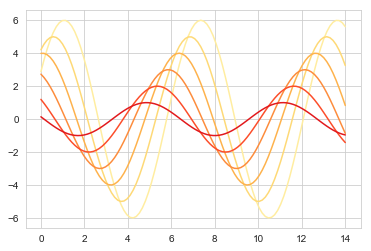

In [33]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
sinplot()

ModuleNotFoundError: No module named 'ffmpeg'

In [4]:
import sys
!conda install --yes --prefix {sys.prefix} bzip2

Solving environment: done

## Package Plan ##

  environment location: /Users/pengfoen/miniconda3

  added / updated specs:
    - bzip2


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bzip2-1.0.6                |       h1de35cc_5         149 KB
    certifi-2019.3.9           |           py37_0         155 KB
    conda-4.6.8                |           py37_0         1.7 MB
    openssl-1.1.1b             |       h1de35cc_1         3.4 MB
    ------------------------------------------------------------
                                           Total:         5.4 MB

The following packages will be SUPERSEDED by a higher-priority channel:

  bzip2              conda-forge::bzip2-1.0.6-h1de35cc_1002 --> pkgs/main::bzip2-1.0.6-h1de35cc_5
  ca-certificates    conda-forge::ca-certificates-2019.3.9~ --> pkgs/main::ca-certificates-2019.1.23-0
  certifi                                       conda